In [1367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [1368]:
test = pd.read_csv("test.csv", sep=";")
train = pd.read_csv("train.csv", sep=";")

In [1369]:
test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0


In [1370]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [1371]:
print(train.shape)
print(test.shape)

(6000, 13)
(2128, 13)


In [1372]:
#check the numbers of samples and features
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
test_ID = test['Id']

#Drop Id ở tập test
test.drop("Id", axis = 1, inplace = True)

print("The test data size after dropping Id feature is : {} ".format(test.shape))

The test data size before dropping Id feature is : (2128, 13) 
The test data size after dropping Id feature is : (2128, 12) 


In [1373]:
train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [1374]:
#kiểm tra có cái nào bị nan trong khung dữ liệu
train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [1375]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [1376]:
print("Có {} duplicated value".format(train.duplicated().sum()))

Có 756 duplicated value


In [1377]:
print("Có {} duplicated value".format(test.duplicated().sum()))

Có 183 duplicated value


In [1378]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [1379]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2128 non-null   object 
 1   year          2128 non-null   int64  
 2   km_driven     2128 non-null   int64  
 3   fuel          2128 non-null   object 
 4   seller_type   2128 non-null   object 
 5   transmission  2128 non-null   object 
 6   owner         2128 non-null   object 
 7   mileage       2066 non-null   object 
 8   engine        2066 non-null   object 
 9   max_power     2067 non-null   object 
 10  torque        2066 non-null   object 
 11  seats         2066 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 199.6+ KB


In [1380]:
train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

## EDA

In [1381]:
#Tìm số lượng giá trị duy nhất có trong mỗi cột
train.nunique()

name             1801
year               28
selling_price     588
km_driven         760
fuel                4
seller_type         3
transmission        2
owner               5
mileage           371
engine            118
max_power         303
torque            413
seats               9
dtype: int64

In [1382]:
train.year.value_counts()

2017    752
2016    630
2018    608
2015    572
2013    493
2012    485
2014    470
2011    448
2019    425
2010    290
2009    165
2008    159
2007    130
2006     86
2005     73
2020     49
2004     46
2003     39
2002     24
2000     14
1999     11
1997     10
2001      8
1998      7
1996      2
1995      2
1983      1
1994      1
Name: year, dtype: int64

Diesel    3265
Petrol    2664
CNG         44
LPG         27
Name: fuel, dtype: int64


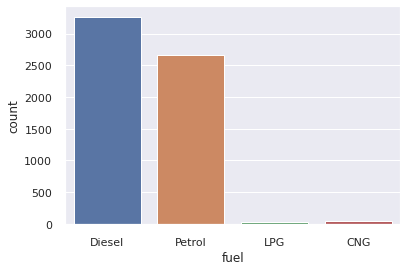

In [1383]:
sns.countplot(x='fuel',data=train)
print(train.fuel.value_counts())

Hai loại fuel được sử dụng nhiều là Diesel và Petrol. Hai loại fuel rất ít dòng xe sử dụng (chiếm số lượng rất nhỏ) là LPG và CNG.

Manual       87.133333
Automatic    12.866667
Name: transmission, dtype: float64


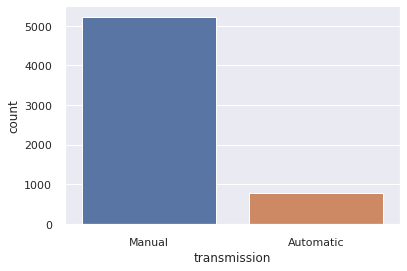

In [1384]:
sns.countplot(x='transmission',data=train)
print(train.transmission.value_counts(normalize=True)*100)

Nhiều loại xe sử dụng hộp số sàn hơn là hộp số tự động (hơn gấp 4 lần).

First Owner             65.066667
Second Owner            25.966667
Third Owner              6.900000
Fourth & Above Owner     1.983333
Test Drive Car           0.083333
Name: owner, dtype: float64


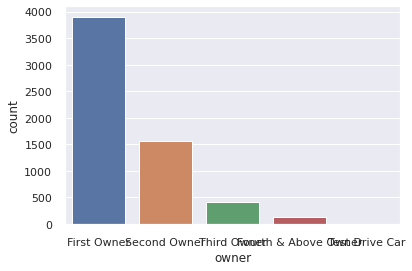

In [1385]:
sns.countplot(x='owner',data=train)
print(train.owner.value_counts(normalize=True)*100)

5.0     4590
7.0      842
8.0      175
4.0       99
9.0       68
6.0       49
10.0      15
2.0        2
14.0       1
Name: seats, dtype: int64


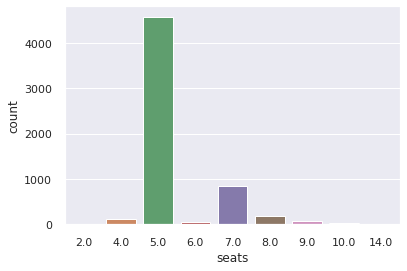

In [1386]:
sns.countplot(x='seats',data=train)
print(train.seats.value_counts())

Đa số các xe có 5 chỗ ngồi (4590/6000 chiếc ở tập train)

5.0     1664
7.0      278
8.0       61
4.0       34
6.0       13
9.0       12
10.0       4
Name: seats, dtype: int64


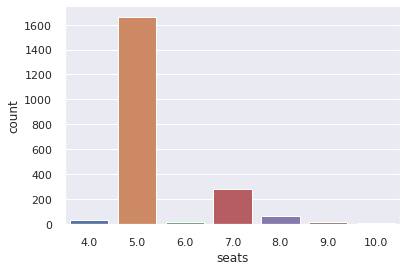

In [1387]:
sns.countplot(x='seats',data=test)
print(test.seats.value_counts())

## Outliers

In [1388]:
#standardizing data
sellingprice_scaled = StandardScaler().fit_transform(train['selling_price'][:,np.newaxis]);
low_range = sellingprice_scaled[sellingprice_scaled[:,0].argsort()][:10]
high_range= sellingprice_scaled[sellingprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.75474756]
 [-0.75474756]
 [-0.75288294]
 [-0.75059307]
 [-0.74854867]
 [-0.74854867]
 [-0.74854867]
 [-0.74854867]
 [-0.74234978]
 [-0.74234978]]

outer range (high) of the distribution:
[[ 6.55126441]
 [ 6.64672732]
 [ 6.64672732]
 [ 6.64672732]
 [ 6.64672732]
 [ 6.64672732]
 [ 6.64672732]
 [ 6.92319782]
 [ 7.29513123]
 [11.60583946]]


- Low range values khá là tương tự nhau và không quá xa 0.
- High range values khá là xa không, có giá trị là 6.55 đến 11.6, đặc biệt chú ý đến range 7.295 và 11.605

## Bivariate analysis

In [1389]:
train.describe()

,year,selling_price,km_driven,seats
count,6000.000000,6.000000e+03,6.000000e+03,5841.000000
mean,2013.814833,6.387764e+05,6.997216e+04,5.429550
std,4.026733,8.066632e+05,5.188961e+04,0.977071
min,1983.000000,3.000000e+04,1.000000e+03,2.000000
25%,2011.000000,2.557498e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.900000e+04,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,14.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


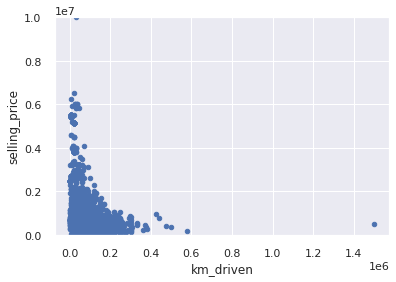

In [1390]:
# Selling_price và 'km_driven'
var = 'km_driven'
data = pd.concat([train['selling_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,10000000));

In [1391]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
trace0 = go.Box(y=train['selling_price'],name='Selling_price')
trace1 = go.Box(y=data['km_driven'],name='km_driven')
trace2 = go.Box(y=train['seats'],name='seats')
trace3 = go.Box(y=train['year'],name='year')
fig = make_subplots(rows=2, cols=3)
fig.append_trace(trace0, row = 1, col = 1)
fig.append_trace(trace1, row = 1, col = 2)
fig.append_trace(trace2, row = 1, col = 3)
fig.append_trace(trace3, row = 2, col = 1)
fig.update_layout(width=800, height=400, title='Box Plot to check for outliers')

fig.show()

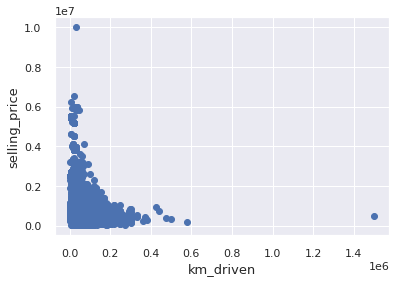

In [1392]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['km_driven'], train['selling_price'])
plt.ylabel('selling_price', fontsize=13)
plt.xlabel('km_driven', fontsize=13)
plt.show()

km_driven: số km mà xe đã đi.
xe đã đi càng nhiều (từ 200000 đổ ra) giá xe càng thấp.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


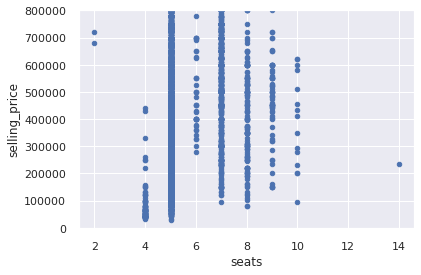

In [1393]:
var = 'seats'
data = pd.concat([train['selling_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


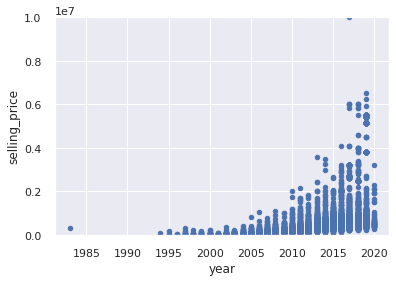

In [1394]:
var = 'year'
data = pd.concat([train['selling_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,10000000));

Max giá của những năm 2016 đến 2019 cao hơn hẳn max giá của những năm khác.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


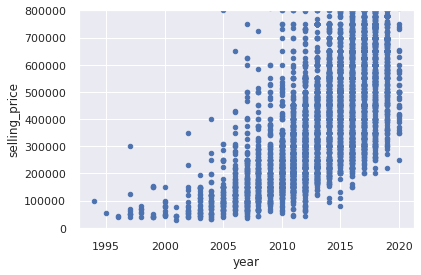

In [1280]:
var = 'year'
data = pd.concat([train['selling_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,800000));

Min giá của xe từ năm 2015 (đặc biệt từ năm 2017) đến năm 2020 cao hơn hẳn min giá của những năm khác.

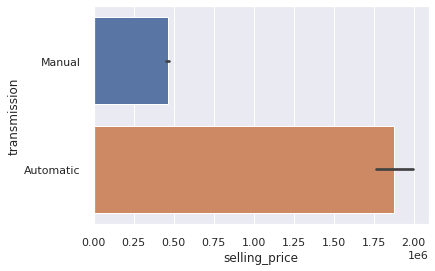

In [1281]:
#transmission & selling_price
sns.barplot(y="transmission", x="selling_price", data=train)

Giá của xe dùng hộp số tự động có khoảng rộng hơn nhiều so với hộp số sàn (Manual). Giá của xe dùng hộp số sàn có khoảng khá hẹp và có mức giá thấp.

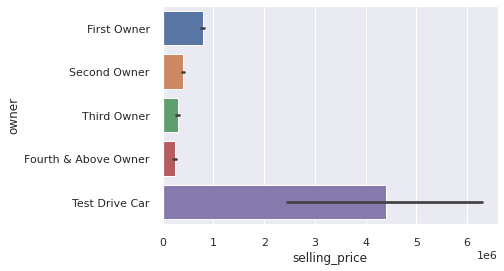

In [1282]:
#owner vs selling_price
sns.barplot(y="owner", x="selling_price", data=train)

Test Drive Car có các xe có mức giá cao hơn hẳn những phân loại owner khác.

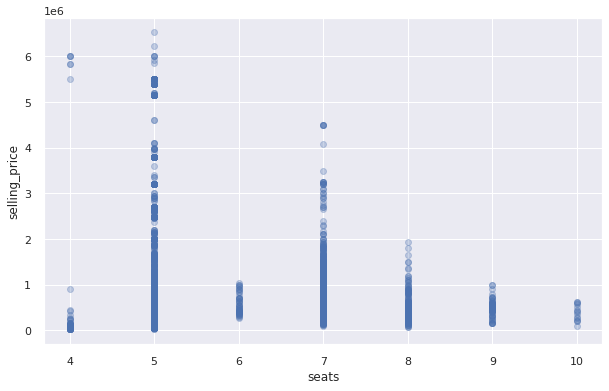

In [1283]:
plt.figure(figsize=(10,6))
dc=train.copy()
plt.scatter(dc['seats'],dc['selling_price'],alpha=0.3)
plt.xlabel("seats")
plt.ylabel('selling_price')
plt.show()

Có nhiều xe 5 chỗ ngồi và có khoảng giá khá rộng và có một số xe 5 chỗ có phân khúc giá khá cao.
Không có nhiều xe 4 chỗ nhưng hầu hết đều ở phân khúc giá thấp, nhưng có một số xe ngoại lệ lại ở phân khúc giá cao.
Xe 2 chỗ và 14 chỗ không có nhiều và hai loại xe đấy đều có phân khúc giá thấp.

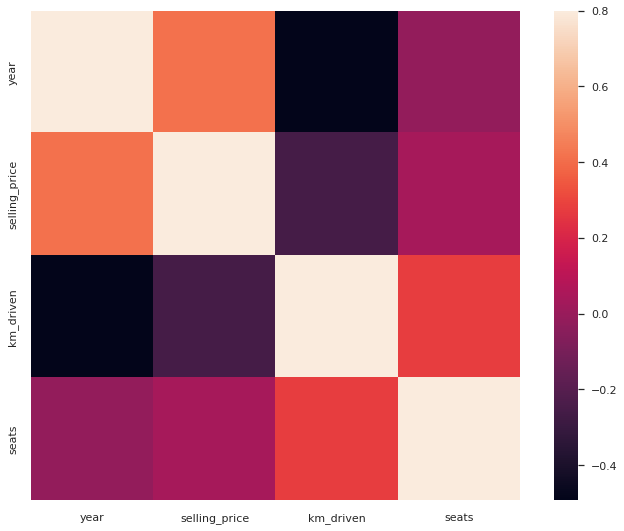

In [1284]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Vì không có giá trị |cor| >0.8 nên không có hiện tượng tự tương quan giữa các biến với nhau.
Vậy không cần bỏ bất kì biến nào.


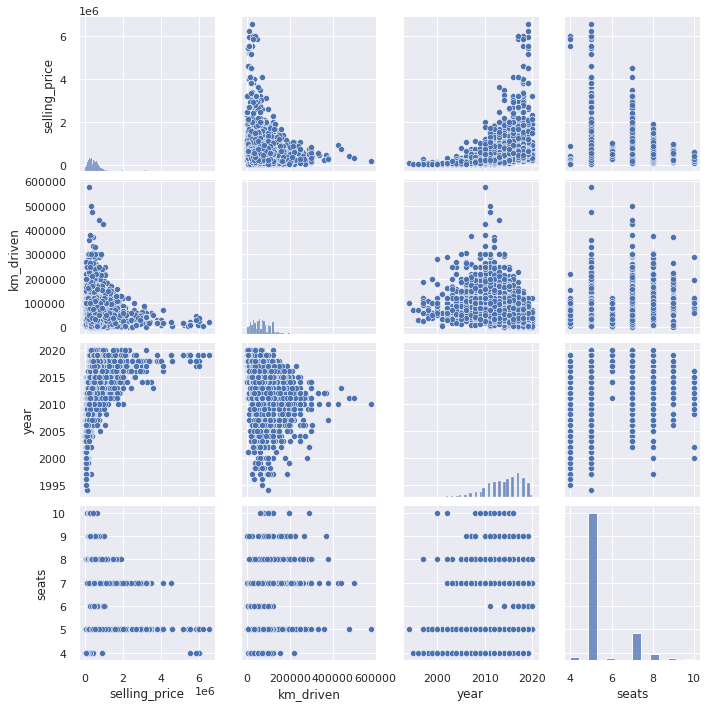

In [1285]:
#scatterplot
sns.set()
cols = ['selling_price', 'km_driven', 'year', 'seats']
sns.pairplot(train[cols], size = 2.5)
plt.show();

Phân tích selling_price


 mu = 648542.70 and sigma = 804877.25



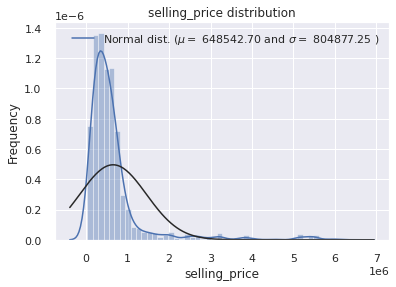

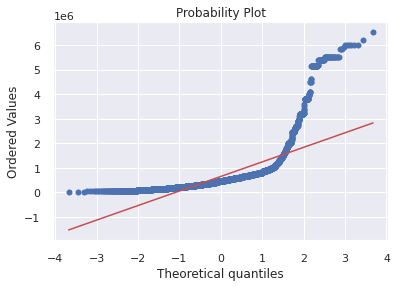

In [1192]:
sns.distplot(train['selling_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['selling_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('selling_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['selling_price'], plot=plt)
plt.show()

In [1193]:
#skewness and kurtosis
print("Skewness: %f" % train['selling_price'].skew())
print("Kurtosis: %f" % train['selling_price'].kurt())

Skewness: 4.052728
Kurtosis: 18.993809



The target variable bị lệch phải (right skewness). Vì các mô hình (tuyến tính) mong muốn dữ liệu được phân phối bình thường, chúng ta cần transform the varible và làm cho nó được phân phối bình thường hơn.

In [1314]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


### Missing data

In [1395]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train

,Total,Percent
torque,160,0.026667
seats,159,0.026500
engine,159,0.026500
mileage,159,0.026500
max_power,154,0.025667
owner,0,0.000000
transmission,0,0.000000
seller_type,0,0.000000
fuel,0,0.000000
km_driven,0,0.000000


In [1396]:
train = train.dropna()

In [1397]:
y_train = train["selling_price"]

In [1398]:
y_train

0        850000
1        750000
2       1500000
3        795000
4       3800000
         ...   
5995     235000
5996     390000
5997     450000
5998     250000
5999     550000
Name: selling_price, Length: 5840, dtype: int64

In [1399]:
train.drop(['selling_price'], axis=1, inplace=True)

In [1400]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5840 non-null   object 
 1   year          5840 non-null   int64  
 2   km_driven     5840 non-null   int64  
 3   fuel          5840 non-null   object 
 4   seller_type   5840 non-null   object 
 5   transmission  5840 non-null   object 
 6   owner         5840 non-null   object 
 7   mileage       5840 non-null   object 
 8   engine        5840 non-null   object 
 9   max_power     5840 non-null   object 
 10  torque        5840 non-null   object 
 11  seats         5840 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 593.1+ KB


In [1401]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2128 non-null   object 
 1   year          2128 non-null   int64  
 2   km_driven     2128 non-null   int64  
 3   fuel          2128 non-null   object 
 4   seller_type   2128 non-null   object 
 5   transmission  2128 non-null   object 
 6   owner         2128 non-null   object 
 7   mileage       2066 non-null   object 
 8   engine        2066 non-null   object 
 9   max_power     2067 non-null   object 
 10  torque        2066 non-null   object 
 11  seats         2066 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 199.6+ KB


In [1402]:
train.drop(['name'], axis=1, inplace=True)
test.drop(['name'], axis=1, inplace=True)

In [1403]:
train[['mileage', 'unit']] = train['mileage'].str.split(' ', expand=True)
train[['mileage']]
train["mileage"] = train["mileage"].astype((float))


In [1404]:
test['mileage'] = test['mileage'].str.replace(' kmpl','',True)
test['mileage'] = test['mileage'].str.replace(' km/kg','',True)
test['mileage'] = test['mileage'].astype(float)
test['mileage'].fillna(test['mileage'].mean(),inplace = True)

In [1405]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2128 non-null   int64  
 1   km_driven     2128 non-null   int64  
 2   fuel          2128 non-null   object 
 3   seller_type   2128 non-null   object 
 4   transmission  2128 non-null   object 
 5   owner         2128 non-null   object 
 6   mileage       2128 non-null   float64
 7   engine        2066 non-null   object 
 8   max_power     2067 non-null   object 
 9   torque        2066 non-null   object 
 10  seats         2066 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 183.0+ KB


In [1406]:
train[['engine', 'unit']] = train['engine'].str.split(' ', expand=True)
train[['engine']]
train["engine"] = train["engine"].astype((float))

In [1407]:
test['engine']

0       1598 CC
1       1497 CC
2       1197 CC
3       2179 CC
4       1498 CC
         ...   
2123    1197 CC
2124    1248 CC
2125    1396 CC
2126    1582 CC
2127    1197 CC
Name: engine, Length: 2128, dtype: object

In [1408]:
test['engine'] = test['engine'].str.replace(' CC','',True)
test['engine'] = test['engine'].astype(float)
test['engine'].fillna(test['engine'].mean(),inplace = True)

In [1409]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2128 non-null   int64  
 1   km_driven     2128 non-null   int64  
 2   fuel          2128 non-null   object 
 3   seller_type   2128 non-null   object 
 4   transmission  2128 non-null   object 
 5   owner         2128 non-null   object 
 6   mileage       2128 non-null   float64
 7   engine        2128 non-null   float64
 8   max_power     2067 non-null   object 
 9   torque        2066 non-null   object 
 10  seats         2066 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 183.0+ KB


In [1410]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5840 non-null   int64  
 1   km_driven     5840 non-null   int64  
 2   fuel          5840 non-null   object 
 3   seller_type   5840 non-null   object 
 4   transmission  5840 non-null   object 
 5   owner         5840 non-null   object 
 6   mileage       5840 non-null   float64
 7   engine        5840 non-null   float64
 8   max_power     5840 non-null   object 
 9   torque        5840 non-null   object 
 10  seats         5840 non-null   float64
 11  unit          5840 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 593.1+ KB


In [1411]:
train.drop(['unit'], axis=1, inplace=True)

In [1412]:
train[['max_power', 'unit']] = train['max_power'].str.split(' ', expand=True)
train['max_power'] = train['max_power'].astype((float))

In [1413]:
test['max_power']

0       103.5 bhp
1       117.3 bhp
2          82 bhp
3         120 bhp
4       98.96 bhp
          ...    
2123    81.86 bhp
2124    74.02 bhp
2125     52.8 bhp
2126    126.2 bhp
2127    81.80 bhp
Name: max_power, Length: 2128, dtype: object

In [1414]:
test['max_power'] = test['max_power'].str.replace(' bhp','',True)
test['max_power'] = test['max_power'].astype(float)
test['max_power'].fillna(test['max_power'].mean(),inplace = True)

In [1415]:
test['max_power'] = test['max_power'].astype((float))

In [1416]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2128 non-null   int64  
 1   km_driven     2128 non-null   int64  
 2   fuel          2128 non-null   object 
 3   seller_type   2128 non-null   object 
 4   transmission  2128 non-null   object 
 5   owner         2128 non-null   object 
 6   mileage       2128 non-null   float64
 7   engine        2128 non-null   float64
 8   max_power     2128 non-null   float64
 9   torque        2066 non-null   object 
 10  seats         2066 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 183.0+ KB


In [1417]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5840 non-null   int64  
 1   km_driven     5840 non-null   int64  
 2   fuel          5840 non-null   object 
 3   seller_type   5840 non-null   object 
 4   transmission  5840 non-null   object 
 5   owner         5840 non-null   object 
 6   mileage       5840 non-null   float64
 7   engine        5840 non-null   float64
 8   max_power     5840 non-null   float64
 9   torque        5840 non-null   object 
 10  seats         5840 non-null   float64
 11  unit          5840 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 593.1+ KB


In [1418]:
train.drop(['unit'], axis=1, inplace=True)

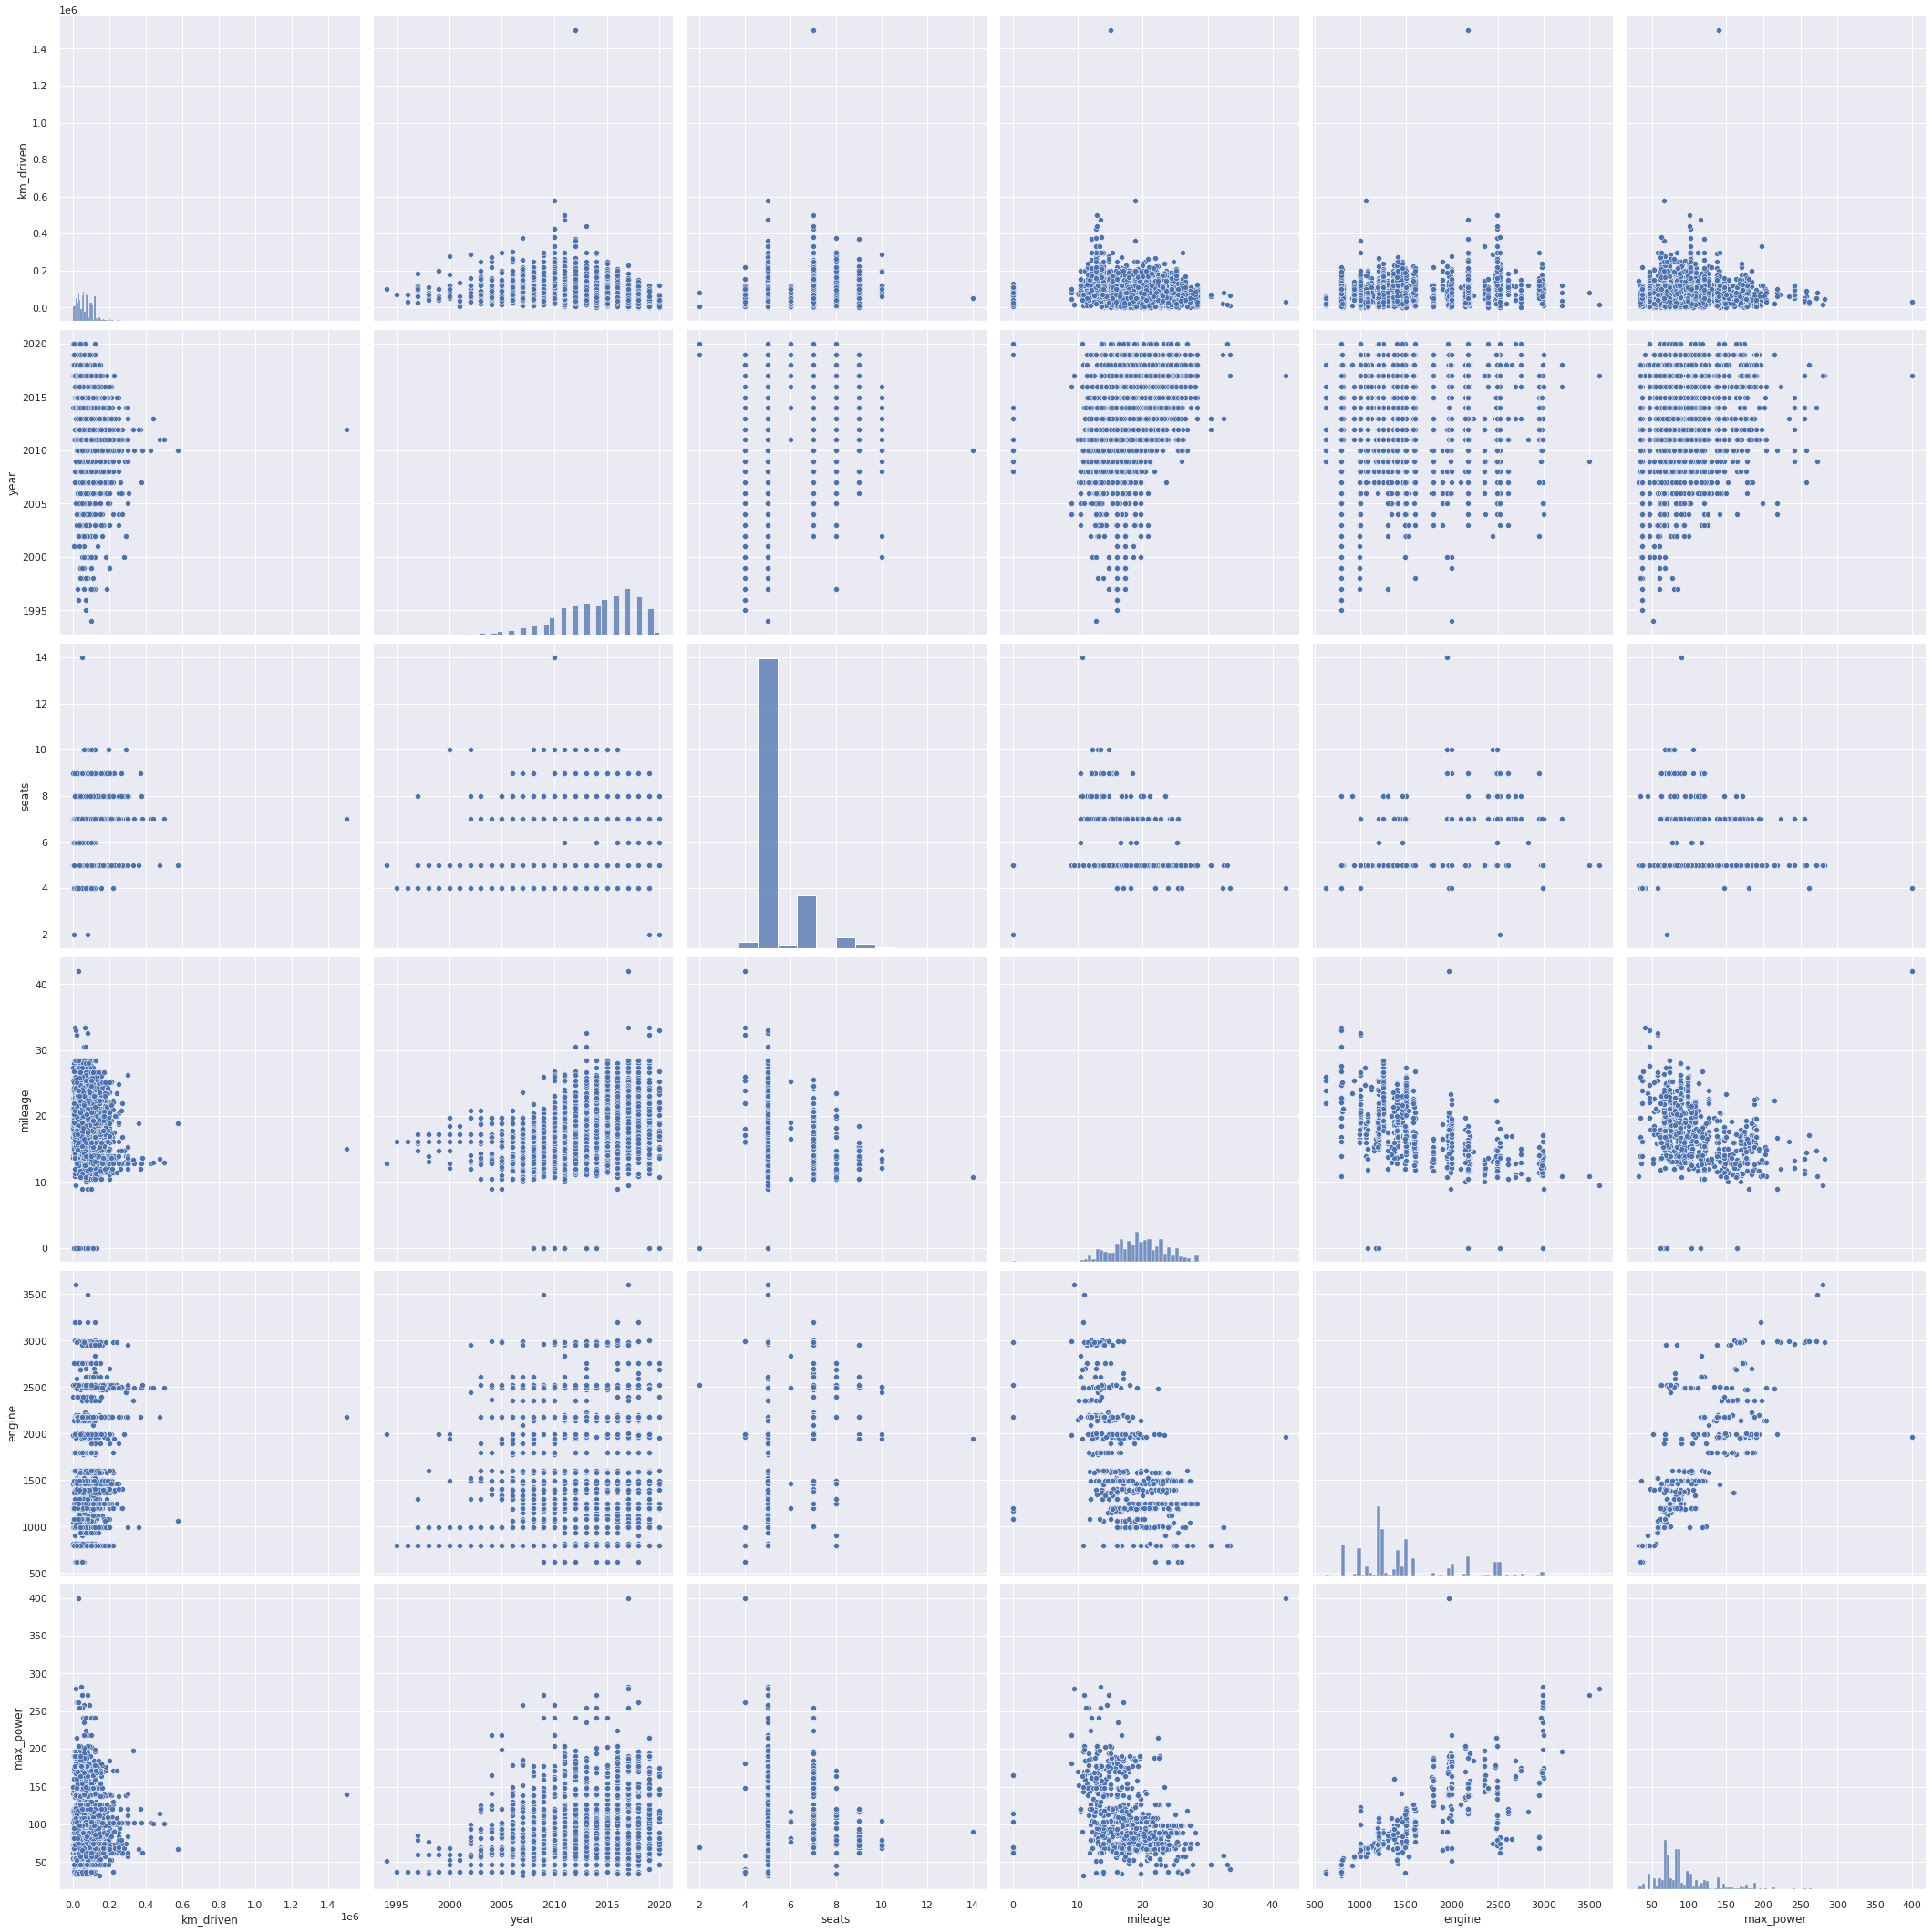

In [1419]:
#scatterplot
sns.set()
cols = ['km_driven', 'year', 'seats','mileage','engine','max_power']
sns.pairplot(train[cols], size = 5.0)
plt.show();

In [1420]:
train.drop(['torque'], axis=1, inplace=True)
test.drop(['torque'], axis=1, inplace=True)

In [1421]:
test['seats'] = test['seats'].astype(float)
test['seats'].fillna(test['seats'].mean(),inplace = True)

In [1422]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2128 non-null   int64  
 1   km_driven     2128 non-null   int64  
 2   fuel          2128 non-null   object 
 3   seller_type   2128 non-null   object 
 4   transmission  2128 non-null   object 
 5   owner         2128 non-null   object 
 6   mileage       2128 non-null   float64
 7   engine        2128 non-null   float64
 8   max_power     2128 non-null   float64
 9   seats         2128 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 166.4+ KB


In [1423]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5840 non-null   int64  
 1   km_driven     5840 non-null   int64  
 2   fuel          5840 non-null   object 
 3   seller_type   5840 non-null   object 
 4   transmission  5840 non-null   object 
 5   owner         5840 non-null   object 
 6   mileage       5840 non-null   float64
 7   engine        5840 non-null   float64
 8   max_power     5840 non-null   float64
 9   seats         5840 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 661.9+ KB


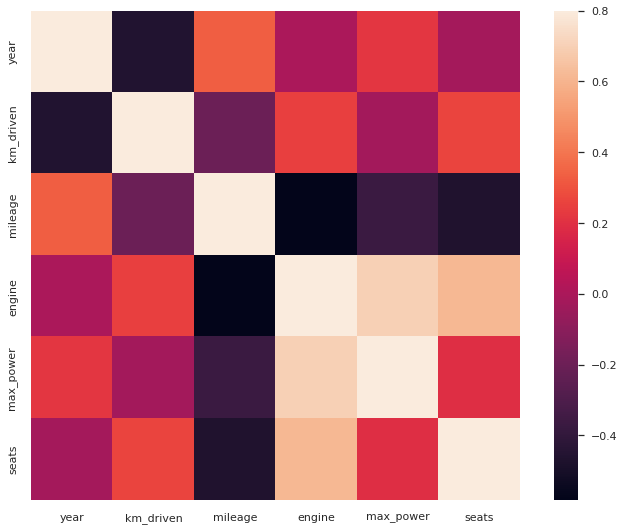

In [1424]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Vì không có giá trị |cor| >0.8 nên không có hiện tượng tự tương quan giữa các biến với nhau. Vậy không cần bỏ bất kì biến nào.

Label Encoding

In [1425]:
# Nhận danh sách các biến phân loại
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

print("Các biến phân loại trong tập bộ liệu:", object_cols)

Các biến phân loại trong tập bộ liệu: ['fuel', 'seller_type', 'transmission', 'owner']


In [1426]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding the object dtypes
LE=LabelEncoder()
for i in object_cols:
  train[i]=train[[i]].apply(LE.fit_transform)

In [1427]:
# Nhận danh sách các biến phân loại
s = (test.dtypes == 'object')
object_cols = list(s[s].index)

print("Các biến phân loại trong tập bộ liệu:", object_cols)



Các biến phân loại trong tập bộ liệu: ['fuel', 'seller_type', 'transmission', 'owner']


In [1428]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding the object dtypes
LE=LabelEncoder()
for i in object_cols:
  test[i]=test[[i]].apply(LE.fit_transform)

In [1429]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2128 non-null   int64  
 1   km_driven     2128 non-null   int64  
 2   fuel          2128 non-null   int64  
 3   seller_type   2128 non-null   int64  
 4   transmission  2128 non-null   int64  
 5   owner         2128 non-null   int64  
 6   mileage       2128 non-null   float64
 7   engine        2128 non-null   float64
 8   max_power     2128 non-null   float64
 9   seats         2128 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 166.4 KB


In [1430]:
numeric_feats = train.dtypes[train.dtypes != "object"].index
from scipy.stats import skew

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness)

from scipy.stats import kurtosis
kurt_feats = train[numeric_feats].apply(lambda x: kurtosis(x.dropna())).sort_values(ascending=False)
print("\nKurt in numerical features: \n")
kurtosis = pd.DataFrame({'Kurt' :kurt_feats})
print(kurtosis)


Skew in numerical features: 

                  Skew
km_driven     4.968648
seats         1.959613
max_power     1.625277
owner         1.287967
engine        1.100944
fuel          0.196692
mileage      -0.136637
seller_type  -0.911958
year         -1.006377
transmission -2.180731

Kurt in numerical features: 

                    Kurt
km_driven     102.143020
seats           3.888918
max_power       3.816427
transmission    2.755586
seller_type     2.424936
year            1.316724
owner           0.611481
mileage         0.606425
engine          0.598922
fuel           -1.896093


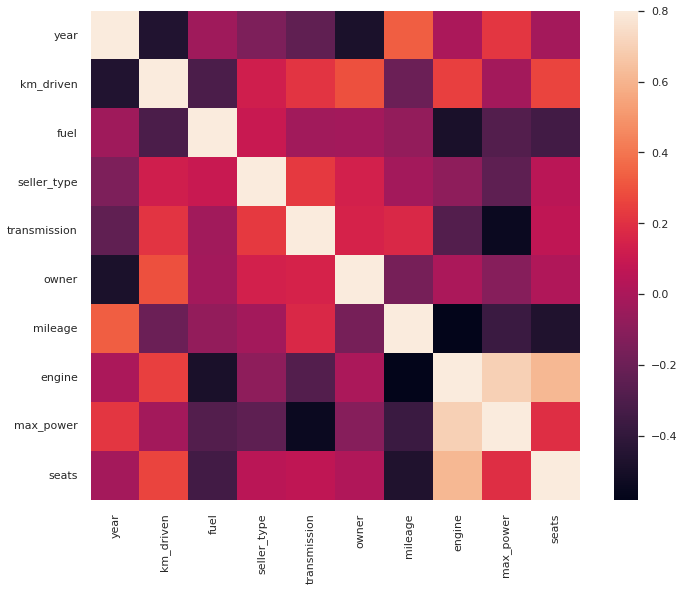

In [1431]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Training Model

In [1432]:
y_train 

0        850000
1        750000
2       1500000
3        795000
4       3800000
         ...   
5995     235000
5996     390000
5997     450000
5998     250000
5999     550000
Name: selling_price, Length: 5840, dtype: int64

In [1433]:
#Getting dummy categorical features
train = pd.get_dummies(train)
print(train.shape)

(5840, 10)


In [1434]:
train.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2018,9500,1,1,1,0,21.50,1497.0,108.50,5.0
1,2018,30000,1,1,1,0,21.19,1396.0,88.76,5.0
2,2015,80000,1,1,0,2,12.55,2982.0,168.50,7.0
3,2015,35000,3,1,1,0,17.01,1591.0,121.30,5.0
4,2019,20000,1,1,0,0,18.00,1969.0,190.00,5.0


In [1435]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5840 non-null   int64  
 1   km_driven     5840 non-null   int64  
 2   fuel          5840 non-null   int64  
 3   seller_type   5840 non-null   int64  
 4   transmission  5840 non-null   int64  
 5   owner         5840 non-null   int64  
 6   mileage       5840 non-null   float64
 7   engine        5840 non-null   float64
 8   max_power     5840 non-null   float64
 9   seats         5840 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 661.9 KB


In [1436]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2128 non-null   int64  
 1   km_driven     2128 non-null   int64  
 2   fuel          2128 non-null   int64  
 3   seller_type   2128 non-null   int64  
 4   transmission  2128 non-null   int64  
 5   owner         2128 non-null   int64  
 6   mileage       2128 non-null   float64
 7   engine        2128 non-null   float64
 8   max_power     2128 non-null   float64
 9   seats         2128 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 166.4 KB


# Modelling

In [1437]:
from sklearn.ensemble import ExtraTreesRegressor

In [1438]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, y_train, test_size = 0.2, random_state = 25)

In [1439]:
rf = ExtraTreesRegressor()
rf.fit(X_train, Y_train)
pred_test = rf.predict(X_test)
print(rf.score(X_train,Y_train))
print(rf.score(X_test,Y_test))



0.9997200334101909
0.9420200646132997


In [1444]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error      : ', metrics.mean_absolute_error(Y_test, pred_test))
print('Mean Squared  Error      : ', metrics.mean_squared_error(Y_test, pred_test))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(Y_test, pred_test)))
print('R Squared Error          : ', metrics.r2_score(Y_test, pred_test))

Mean Absolute Error      :  81275.00888127854
Mean Squared  Error      :  51324413937.27826
Root Mean Squared  Error :  226548.9217305575
R Squared Error          :  0.9420200646132997


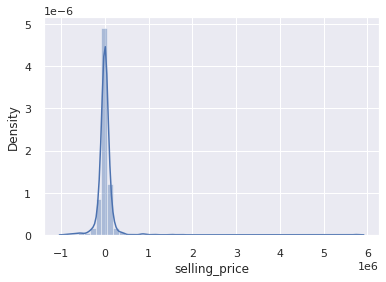

In [1441]:
sns.distplot(Y_test-pred_test)
plt.show()

In [1442]:
pred = rf.predict(test)

In [1443]:
pre = pd.DataFrame()
pre['Id'] = test_ID
pre['Predicted'] = pred
pre.to_csv('prediction.csv',index=False)